### Coursera: Python Project: pillow, tesseract, and opencv  
https://www.coursera.org/learn/python-project  

In [ ]:
# pip3 install pytesseract opencv-python
# sudo apt install tesseract-ocr libleptonica-dev libtesseract-dev

In [ ]:
# https://stackoverflow.com/questions/22249579/opencv-detectmultiscale-minneighbors-parameter
# https://stackoverflow.com/questions/20801015/recommended-values-for-opencv-detectmultiscale-parameters

In [1]:
import cv2
import math
import zipfile
import pytesseract
import numpy as np
from PIL import Image
from PIL import ImageDraw

In [2]:
def crop(cv, bounds):
    im = Image.fromarray(cv)
    images = []
    for (x,y,w,h) in bounds:
        c = im.crop((x,y,x+w,y+h))
        images.append(c)
    return images

def sheet(images):
    x, y = 0, 0
    w, h, cols = 100, 100, 8
    rows = int(math.ceil(len(images) / cols))
    sheet = Image.new('RGB', (w * cols, h * rows))
    for im in images:
        im.thumbnail((w, h))
        sheet.paste(im, (x, y))
        if x + w == sheet.width: x, y = 0, y + h
        else: x = x + w
    return sheet

def load_images(zip_file):
    images = []
    with zipfile.ZipFile(zip_file, 'r') as zfd:
        for info in zfd.infolist():
            with zfd.open(info.filename) as fd:
                cv = np.array(Image.open(fd))
                images.append({'cv': cv, 'name': info.filename})
    return images

def exctract_text(cv):
    gray_cv = cv2.cvtColor(cv, cv2.COLOR_RGB2GRAY)
    bin_cv = cv2.threshold(gray_cv, 180, 255, cv2.THRESH_BINARY)[1]
    return pytesseract.image_to_string(Image.fromarray(bin_cv))

def find_faces(cv):
    gray_cv = cv2.cvtColor(cv, cv2.COLOR_RGB2GRAY)
    bin_cv = cv2.threshold(gray_cv, 180, 255, cv2.THRESH_BINARY)[1]
    classifier_path = 'haarcascade_frontalface_default.xml'
    face_cascade = cv2.CascadeClassifier(classifier_path)
    faces = face_cascade.detectMultiScale(bin_cv, scaleFactor=1.38, minNeighbors=3)
    return faces.tolist() if type(faces) == np.ndarray else faces

def show_faces_with_text(images, text):
    for img in images:
        cv, name = img['cv'], img['name']
        if text.lower() in exctract_text(cv).lower():
            print('results found in file', name)
            faces = crop(cv, find_faces(cv))
            if len(faces) > 0: display(sheet(faces))
            else: print('but there were no faces in that file!')

In [3]:
images = load_images('images.zip')

results found in file a-2.png


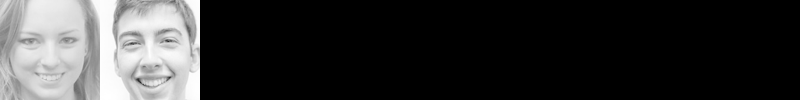

In [4]:
show_faces_with_text(images, 'pizza')

results found in file a-0.png


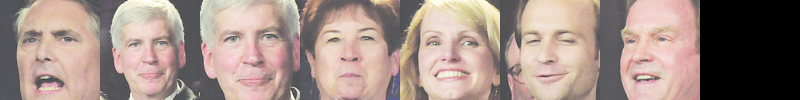

results found in file a-3.png
but there were no faces in that file!


In [5]:
show_faces_with_text(images, 'Christopher')

results found in file a-0.png


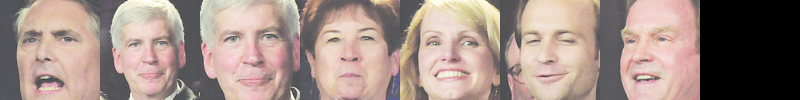

results found in file a-1.png


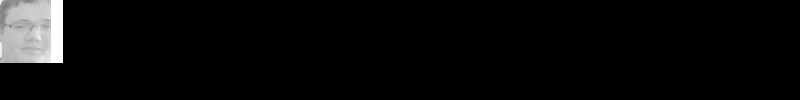

results found in file a-10.png
but there were no faces in that file!
results found in file a-13.png


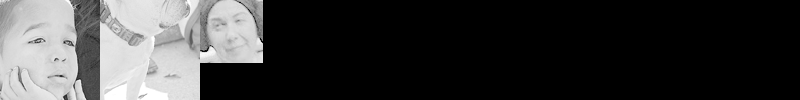

results found in file a-2.png


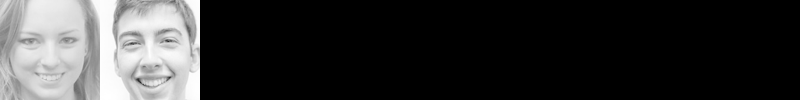

results found in file a-3.png
but there were no faces in that file!
results found in file a-5.png
but there were no faces in that file!
results found in file a-8.png
but there were no faces in that file!
results found in file a-9.png
but there were no faces in that file!


In [6]:
show_faces_with_text(images, 'Mark')